In [3]:
# 2. XY_mixer
from qiskit.circuit.library.standard_gates import RYGate
from qiskit import QuantumCircuit, Aer, execute
from math import sqrt
from qiskit.visualization import plot_histogram
import math

def append_SCS_term(m, l, n):
    qc = QuantumCircuit(n, name = 'SCS_'+str(m)+','+str(l))
    m = m-1
    for i in range(l):
        if (i+1) == 1:
            qc.cx(m-1, m)
            theta = sqrt(1/(m+1))
            c3ry_gate = RYGate(2 * math.acos(theta)).control(1)
            qc.append(c3ry_gate, [m, m-1])
            qc.cx(m-1, m)
        else:
            qc.cx(m-(i+1),m)
            theta = sqrt((i+1)/(m+1))
            c3ry_gate = RYGate(2 * math.acos(theta)).control(2)
            qc.append(c3ry_gate, [m, m-(i+1)+1, m-(i+1)])
            qc.cx(m-(i+1),m)
    return qc
 
def get_Dicke_state_init_circuit(n, B):
    qc = QuantumCircuit(n, name='dicke_init')
    for j in range(B):
        qc.x(n-j-1)
    for i in range(n-1):
#         print(n-i)
        if n-i > B:
            qc.append(append_SCS_term(n-i, B, n), range(n))
        else:
            qc.append(append_SCS_term(n-i, (n-i-1), n), range(n))
        qc.barrier()
    return qc

{'100': 3334, '001': 3302, '010': 3364}


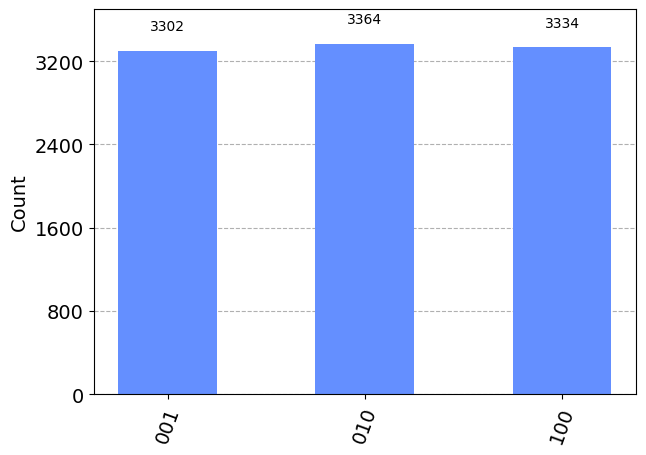

In [4]:
n = 3 # 变量总数
B =1  # 限制1的个数
qc = get_Dicke_state_init_circuit(n, B)
dicke_circuit = QuantumCircuit(n, n)
dicke_circuit.append(qc, range(n))
dicke_circuit.measure(range(n), range(n))
backend = Aer.get_backend('qasm_simulator')
counts = execute(dicke_circuit, backend, shots = 10000).result().get_counts()
print(counts)
plot_histogram(counts)

E:\Anaconda3\anaconda3\envs\qiskit\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


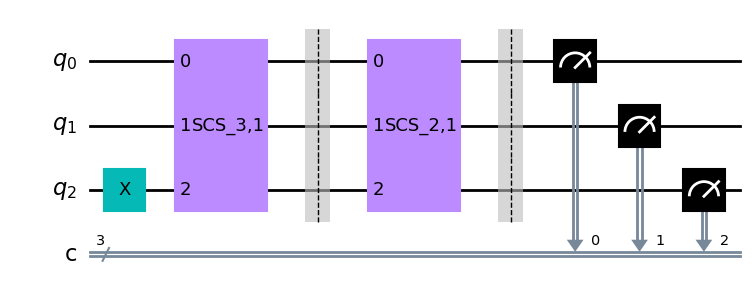

In [5]:
dicke_circuit.decompose().draw('mpl')

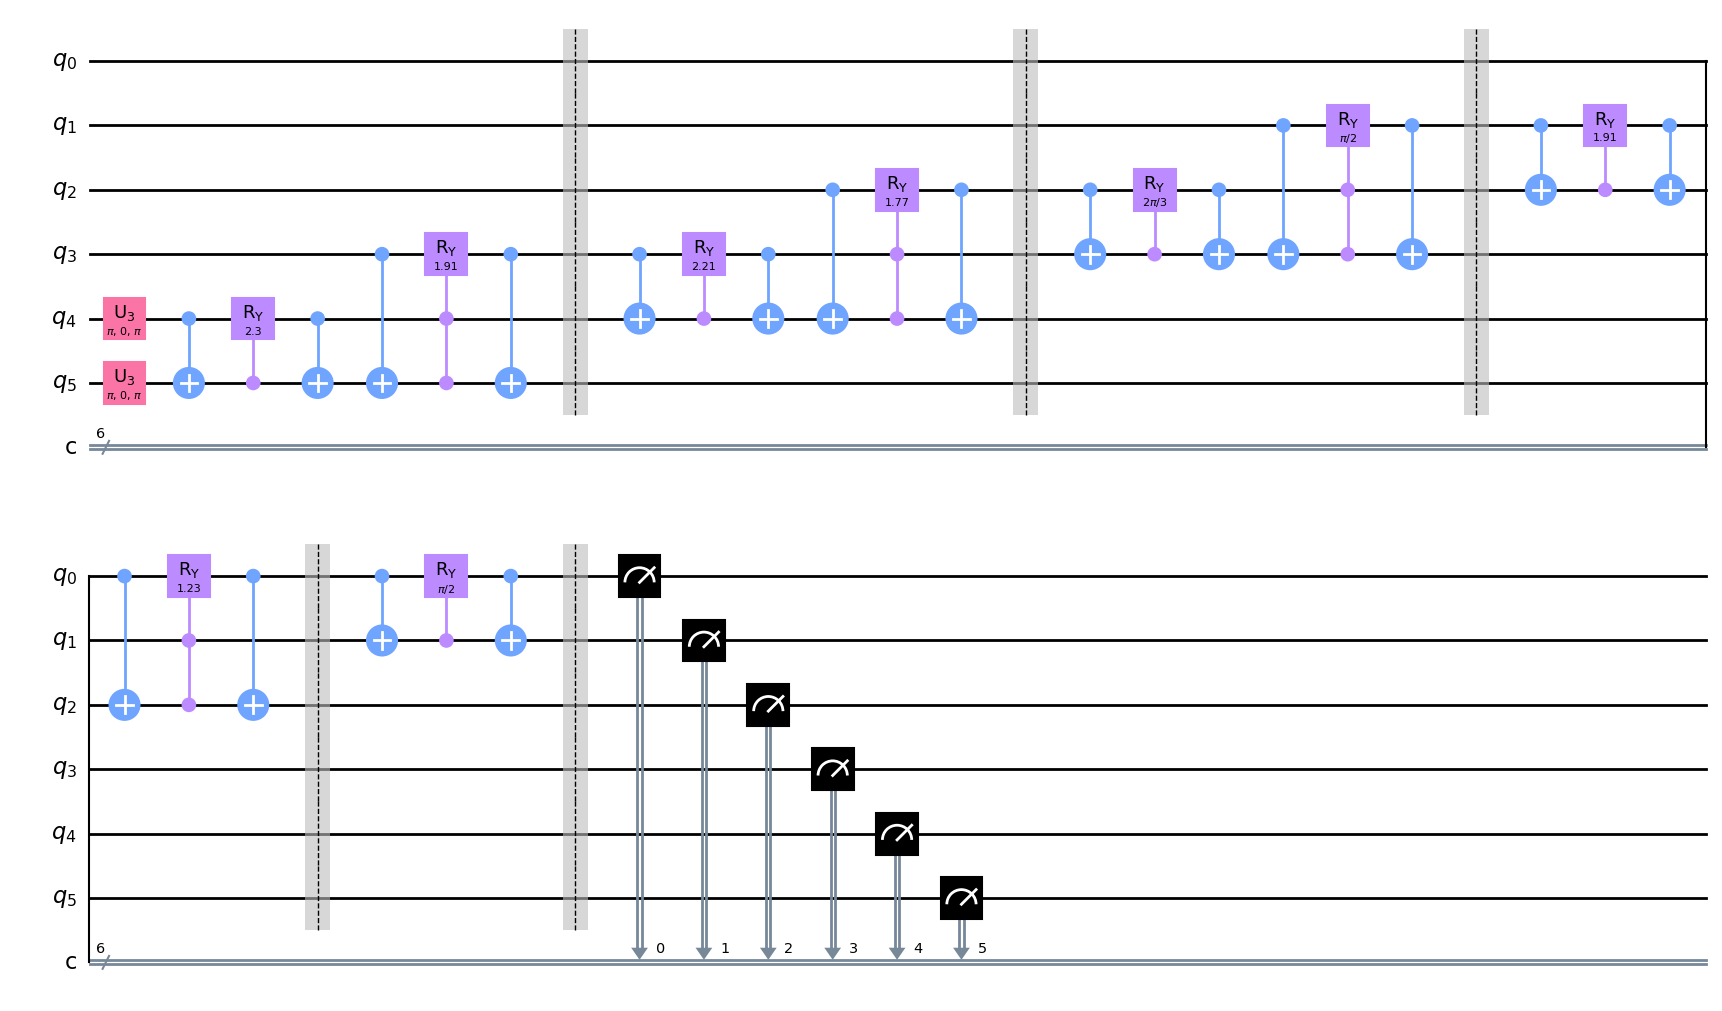

In [4]:
dicke_circuit.decompose().decompose().draw('mpl')